# Data Manipulation II

Se trabajara varias funciones importantes que es necesario trabajar y entender



In [ ]:
#import library and functions

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,10))

df_titanic = pd.read_csv('https://raw.githubusercontent.com/adamerose/datasets/master/titanic.csv')

<Figure size 1440x720 with 0 Axes>

## Datos duplicados

Mucahs veces podemos encontrar muchos datos que tiene datos duplicados , sea porque hubo algun problema de llenado o a veces es necesario definir que hay un subset de variables que nos interesa para verificar su duplicado

Es importante en muchos casos de machine learning omitir o borrar datos duplicados dado que varias veces necesitamos tener independencia de valores



## Encontrar vlores repetidos

Se puede verificar en todo el DataFrame como en una columna ver si hay row duplicadas , y lo determinara de manera bool

In [ ]:
df_titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [ ]:
# check all columns values
df_titanic.duplicated()


0      False
1      False
2      False
3      False
4      False
       ...  
886     True
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [ ]:
# check in some columns
df_titanic.duplicated(subset = ['survived', 'pclass'])

0      False
1      False
2      False
3       True
4       True
       ...  
886     True
887     True
888     True
889     True
890     True
Length: 891, dtype: bool

In [ ]:
#Count duplicated

print(f'Cantidad de filas duplicadas en todo el conjunto de datos {df_titanic.duplicated().sum()} \n')

#count non duplicated

print(f'Cantidad de filas NO DUPLICADAS {(~df_titanic.duplicated()).sum()} ')

Cantidad de filas duplicadas en todo el conjunto de datos 107 

Cantidad de filas NO DUPLICADAS 784 


In [ ]:
# Determinacion de filas que son duplicadas

df_titanic.loc[df_titanic.duplicated(), :]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
47,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
76,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
77,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
87,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
95,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
877,0,3,male,19.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
#determinatar que fila marcarla como duplicada

df_titanic.loc[df_titanic.duplicated(keep='last'), :] #selecciona que la primera ocurrida esta ok y las demas son marcadas como duplicadas

#same con 'last' = seleccion todas duplicadas menos la ultima ocurrida
# or False = #todas duplicadas

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
26,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
29,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
32,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
784,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
792,0,3,female,NaN,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False
795,0,2,male,39.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True


In [ ]:
#Drop duplicate
df_titanic.drop_duplicates()
# se puede utilizar el mismo parametros keep para seleccionar que rows quedarme

# Funciones de agrupacion



*   Pivot
*   Pivot_table
*   Group by

en todas esas funciones podemos agrupar informacion o mostrarla de diferente manera

Veremos alguno ejemplos




### Pivot

In [ ]:
#Pivot
import numpy as np

df = pd.DataFrame({"name": ['Damian','Alberto','Caro','Damian','Alberto','Caro'],
                   "pais":['Uru','Uru','Uru','Arg','Arg','Arg'],
                   "puerta":np.random.rand(6),
                   "meses":[10, 15, np.nan, 2, 9, 15]})
df

,name,pais,puerta,meses
0,Damian,Uru,0.297933,10.0
1,Alberto,Uru,0.446502,15.0
2,Caro,Uru,0.638217,NaN
3,Damian,Arg,0.631233,2.0
4,Alberto,Arg,0.380663,9.0
5,Caro,Arg,0.508076,15.0


In [ ]:
ex = df.pivot(index='name', columns='pais', values=['puerta'])
ex

puerta          
pais          Arg       Uru
name                       
Alberto  0.659562  0.839927
Caro     0.774455  0.355426
Damian   0.009352  0.466878

In [ ]:
ex['puerta']['Arg']

name
Alberto    0.659562
Caro       0.774455
Damian     0.009352
Name: Arg, dtype: float64

In [ ]:
ex.columns

MultiIndex([('puerta', 'Arg'),
            ('puerta', 'Uru')],
           names=[None, 'pais'])

In [ ]:
df.iloc[5] = ['Damian', 'Uru', 0.780, 5]

df.pivot(index='name', columns='pais', values=['puerta', 'meses'])

#tiene un error porque los indices y columns usados en e pivot hay duplicados
#indice 0 y 5

ValueError: ignored

### Pivot_table

Funcion totalmente relacionada a pivot , solo que se puede hacer calculos



In [ ]:
df

,name,pais,puerta,meses
0,Damian,Uru,0.466878,10.0
1,Alberto,Uru,0.839927,15.0
2,Caro,Uru,0.355426,NaN
3,Damian,Arg,0.009352,2.0
4,Alberto,Arg,0.659562,9.0
5,Damian,Uru,0.780000,5.0


In [ ]:
df.pivot_table(index='name', columns='pais', values=['puerta'], aggfunc='sum')

puerta          
pais          Arg       Uru
name                       
Alberto  0.659562  0.839927
Caro          NaN  0.355426
Damian   0.009352  1.246878

In [ ]:
a = df.pivot_table(index='name', columns='pais', values=['puerta', 'meses'],aggfunc={'meses':len,'puerta':[np.sum, np.mean]}, fill_value=0)
#aggfunc se puede hacer para varios calculos pero depende de poner el nombre de la columna a calcular y luego usar la funcion
#ademas fill_value es para cuando tenes valores nulos y poder llenarlos con un valor determinado
a

meses        puerta                              
          len          mean                 sum          
pais      Arg Uru       Arg       Uru       Arg       Uru
name                                                     
Alberto     1   1  0.380663  0.446502  0.380663  0.446502
Caro        1   1  0.508076  0.638217  0.508076  0.638217
Damian      1   1  0.631233  0.297933  0.631233  0.297933

In [ ]:
a['puerta']['sum']['Uru']

name
Alberto    0.446502
Caro       0.638217
Damian     0.297933
Name: Uru, dtype: float64

In [ ]:
a.columns = ['_'.join(col).strip() for col in a.columns.values]

In [ ]:
a

,meses_len_Arg,meses_len_Uru,puerta_mean_Arg,puerta_mean_Uru,puerta_sum_Arg,puerta_sum_Uru
name,,,,,,
Alberto,1,1,0.380663,0.446502,0.380663,0.446502
Caro,1,1,0.508076,0.638217,0.508076,0.638217
Damian,1,1,0.631233,0.297933,0.631233,0.297933


### Group by
Es un metodo similar al pivot_table , solo que no queda con la misma forma el dataFrame

picto_table es mas de calculo filas y columnas y groupby es mas calulado en una sola fila  o multiple columnas diferentes , pero son muy similars


In [ ]:
ex_group =df.groupby(["name","pais"]).sum()
ex_group

puerta  meses
name    pais                 
Alberto Arg   0.380663    9.0
        Uru   0.446502   15.0
Caro    Arg   0.508076   15.0
        Uru   0.638217    0.0
Damian  Arg   0.631233    2.0
        Uru   0.297933   10.0

In [ ]:
ex_group.reset_index()

,name,pais,puerta,meses
0,Alberto,Arg,0.380663,9.0
1,Alberto,Uru,0.446502,15.0
2,Caro,Arg,0.508076,15.0
3,Caro,Uru,0.638217,0.0
4,Damian,Arg,0.631233,2.0
5,Damian,Uru,0.297933,10.0


In [ ]:
#example used with titanic datasets

df_titanic.pivot_table(index='sex', columns='embark_town', values=['fare', 'survived'], aggfunc={"survived": sum, "fare": "mean"})

fare                         survived                       
embark_town  Cherbourg Queenstown Southampton Cherbourg Queenstown Southampton
sex                                                                           
female       75.169805  12.634958   38.740929        64         27         140
male         48.262109  13.838922   21.711996        29          3          77

In [ ]:
#df_titanic.groupby(['sex','embark_town']['survived', 'fare'], aggfunc={"survived": sum, "fare": "mean"})

a = df_titanic.groupby(['sex','embark_town']).agg({
    'sibsp':['sum', 'max'],
    'age':'mean',
    'survived':'sum',
    'fare': lambda x: x.max() - x.min()
    })
a

sibsp            age survived      fare
                     sum max       mean      sum  <lambda>
sex    embark_town                                        
female Cherbourg      40   2  28.344262       64  505.1042
       Queenstown      8   2  24.291667       27   83.2500
       Southampton   170   8  27.771505      140  255.7500
male   Cherbourg      25   2  32.998841       29  508.3167
       Queenstown     25   4  30.937500        3   83.2500
       Southampton   198   8  30.291440       77  263.0000

In [ ]:
#una manera de poder renombrar columnas

df_group = df_titanic.groupby(['sex','embark_town']).agg(sum_pax=('sibsp', 'sum'), max_pax=('sibsp', 'max'))
#graficar

df_group

sum_pax  max_pax
sex    embark_town                  
female Cherbourg         40        2
       Queenstown         8        2
       Southampton      170        8
male   Cherbourg         25        2
       Queenstown        25        4
       Southampton      198        8

In [ ]:
df_group['sum_pax'].unstack().plot.bar(figsize=(20, 10))

In [ ]:
df_group['sum_pax'].groupby(level=0).apply(lambda x : (x / float(x.sum())))

sex     embark_town
female  Cherbourg      0.183486
        Queenstown     0.036697
        Southampton    0.779817
male    Cherbourg      0.100806
        Queenstown     0.100806
        Southampton    0.798387
Name: sum_pax, dtype: float64

#Apply


In [ ]:
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
#df_titanic['embark_town'].apply(lambda element: element.upper())
df_titanic['alone'].apply(lambda element : str(element).upper())

# siempre debemos tener seleccionado las columnas a trabajar y luego poner el apply

0      FALSE
1      FALSE
2       TRUE
3      FALSE
4       TRUE
       ...  
886     TRUE
887     TRUE
888    FALSE
889     TRUE
890     TRUE
Name: alone, Length: 891, dtype: object

In [ ]:
def first_letter(input_str):
  if isinstance(input_str,str):
    return input_str[:1]
  else:
    return 'U'

df_titanic['new_letter'] = df_titanic['embark_town'].apply(lambda element : first_letter(element))
df_titanic[['embark_town', 'new_letter']]


,embark_town,new_letter
0,Southampton,S
1,Cherbourg,C
2,Southampton,S
3,Southampton,S
4,Southampton,S
...,...,...
886,Southampton,S
887,Southampton,S
888,Southampton,S
889,Cherbourg,C


In [ ]:
def concatenate(str_1, str_2):
  if isinstance(str_1, str):
    return str_1+'__'+str_2
  else:
    return 'Unknown'

df_titanic['concatenated'] = df_titanic[['embark_town','class']].apply(lambda row: concatenate(row['embark_town'], row['class']) , axis=1)

df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,new_letter,concatenated
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,S,Southampton__Third
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,C,Cherbourg__First
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,S,Southampton__Third
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,S,Southampton__First
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,S,Southampton__Third


#ejericio

Vamos a tomar un conjunto de datos y vamos a realizar ejericio especificos que dimos recien



1.   Utilizando la funcion get_decade y utilizando el metodo apply de pandas , genera una nueva columna al Df , donde calcule la decada del year
2.   Generar un pivot table donde el index = decada,  columna es genero y se calcule el promedio de la cantidad de cumples
3.   Genera un grupoby de mes y decada y luego calcular la suma y el promedio de la variable births
4.   Con el dataframe anterior genera un barplot directo desde pandas , pero solo de los valores de la suma



In [ ]:
link = 'https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv'

def get_decade(year):
  return 10 * (year // 10)


df = pd.read_csv(link)
df.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [ ]:
get_decade(2005)

2000

In [ ]:
#Utilizando la funcion get_decade y utilizando el metodo apply de pandas , genera una nueva columna al Df , donde calcule la decada del year
df['decada'] = df['year'].apply(lambda element: get_decade(element))
df.tail()

,year,month,day,gender,births,decada
15542,2008,10,NaN,M,183219,2000
15543,2008,11,NaN,F,158939,2000
15544,2008,11,NaN,M,165468,2000
15545,2008,12,NaN,F,173215,2000
15546,2008,12,NaN,M,181235,2000


In [ ]:
#Generar un pivot table donde el index = decada, columna es genero y se calcule el promedio de la cantidad de cumples
df.pivot_table(index='decada', columns='gender', values=['births'])

births               
gender              F              M
decada                              
1960      4566.755208    4808.781250
1970      4267.403569    4497.386393
1980      5460.886072    5740.886635
1990    162328.783333  170171.275000
2000    168789.898148  176911.370370

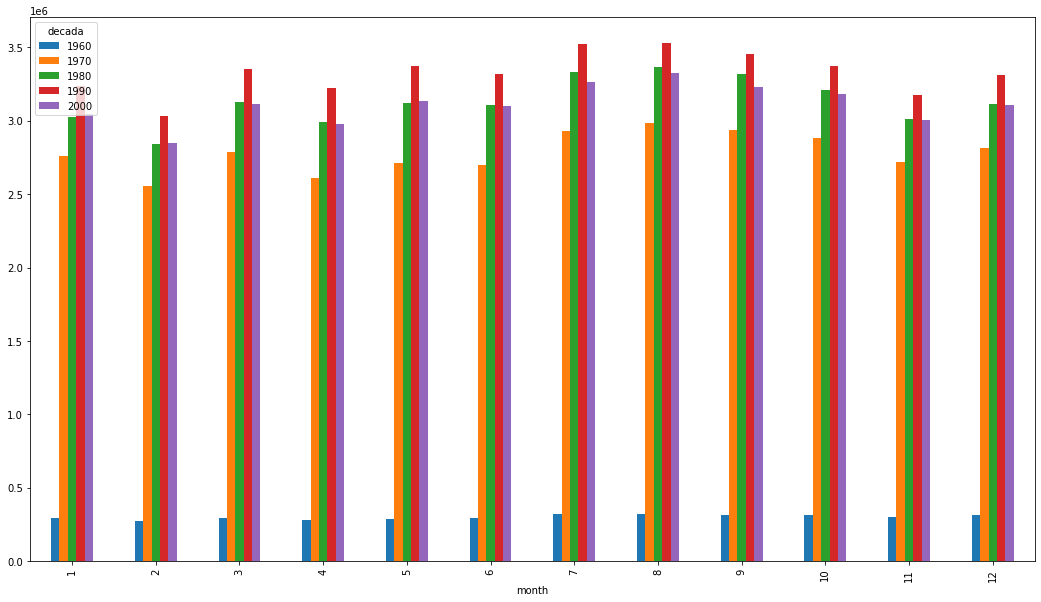

In [ ]:
#Genera un grupoby de mes y decada y luego calcular la suma y el promedio de la variable births

a = df.groupby(['month', 'decada'])['births'].agg(suma_cumple = 'sum', promedio_cumple = 'mean')

a['suma_cumple'].unstack().plot.bar(figsize=(18,10))